In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df=pd.read_csv(r"C:\Users\nonit\OneDrive\Desktop\Ass2_Input.csv")

In [33]:
df.replace(-200, np.nan, inplace=True)
df1 = df.drop(['Date', 'Time'], axis=1)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)
df_imputed

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.000000,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.000000,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.000000,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.000000,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.000000,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [34]:
df_imputed.corr(method='pearson')

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.289975,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),0.773394,1.000000,0.278282,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.289975,0.278282,1.000000,0.281928,0.279761,0.098180,-0.261997,0.156510,0.232979,0.240592,0.066782,-0.052784,0.037173
C6H6(GT),0.812361,0.883795,0.281928,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.795578,0.892964,0.279761,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.762273,0.615941,0.098180,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.613877,-0.771938,-0.261997,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.646349,0.562843,0.156510,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392
PT08.S4(NO2),0.558232,0.682881,0.232979,0.765731,0.777254,0.205485,-0.538468,0.140655,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.759027,0.899324,0.240592,0.865689,0.880578,0.688205,-0.796569,0.629443,0.591144,1.000000,-0.027172,0.124956,0.070751


In [37]:
Q1=df_imputed.quantile(0.25)
Q3=df_imputed.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_no_outliers=df_imputed[(df_imputed>lower_limit)&(df_imputed<upper_limit)]
df_no_outliers.drop('NMHC(GT)',axis=1,inplace=True)
df_no_outliers.fillna(df_no_outliers.mean(),inplace=True)

CO(GT)           9357
PT08.S1(CO)      9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
dtype: int64

In [55]:
x=df_no_outliers.drop('RH', axis=1)
y=df_no_outliers['RH']
scaler=StandardScaler()
X=scaler.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.15, random_state=0)

In [56]:
def reg(X,y,learning_rate=0.01,num_iterations=1000):
    n,d=X.shape
    w=np.zeros(d)
    b=0
    for _ in range(num_iterations):
        y_pred = np.dot(X, w) + b
        error = y_pred - y
        w -= (learning_rate / n) * np.dot(X.T, error)
        b -= (learning_rate / n) * np.sum(error)
    return w,b    

In [57]:
w1, b1 = reg(X_train, y_train)
y_pred_1 = np.dot(X_test, w1) + b1

In [58]:
r2_1 = r2_score(y_test, y_pred_1)
mse_1 = mean_squared_error(y_test, y_pred_1)

In [64]:
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_pred_2 = model_sklearn.predict(X_test)

r2_2 = r2_score(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)

In [61]:
print("Results from Scratch Model:")
print(f"R-squared: {r2_1}")
print(f"Mean Squared Error: {mse_1}")

print("\nResults from Sklearn Model:")
print(f"R-squared: {r2_2}")
print(f"Mean Squared Error: {mse_2}")


Results from Scratch Model:
R-squared: 0.8612960905964068
Mean Squared Error: 41.036748120695094

Results from Sklearn Model:
R-squared: 0.8652828890465453
Mean Squared Error: 39.8572194072667


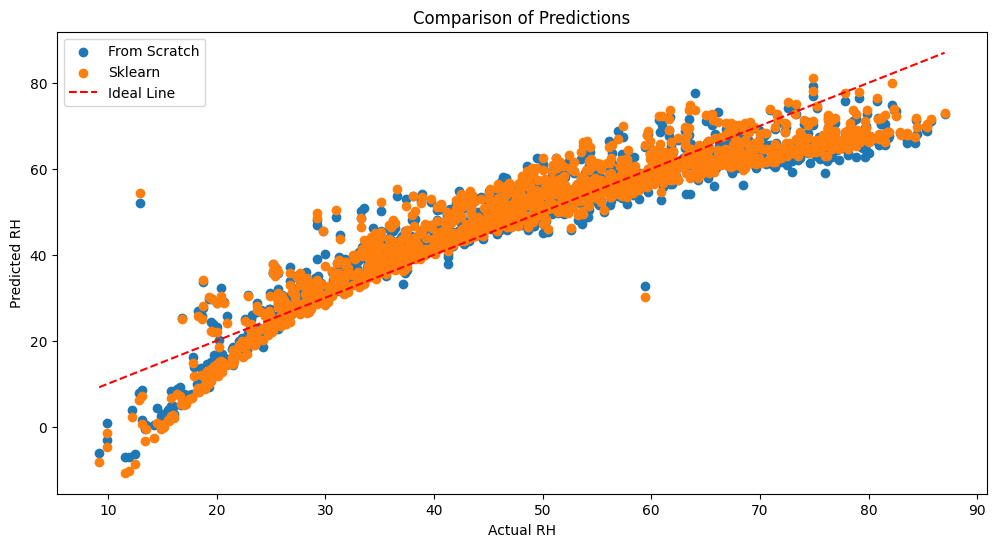

In [63]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_1, label='From Scratch', alpha=1)
plt.scatter(y_test, y_pred_2, label='Sklearn', alpha=1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Line')
plt.title('Comparison of Predictions')
plt.xlabel('Actual RH')
plt.ylabel('Predicted RH')
plt.legend()
plt.show()